# Data Visualization 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from subprocess import check_output

## Amerika da polislerin öldürdüğü insanların dataseti

In [4]:

median_house_hold_in_come = (pd.read_csv('C:/Users/ahmet/Downloads/AI/Veri Bilimi Okulu/archive/MedianHouseholdIncome2015.csv', encoding="windows-1252"))
percentage_people_below_poverty_level = pd.read_csv('C:/Users/ahmet/Downloads/AI/Veri Bilimi Okulu/archive/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('C:/Users/ahmet/Downloads/AI/Veri Bilimi Okulu/archive/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('C:/Users/ahmet/Downloads/AI/Veri Bilimi Okulu/archive/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('C:/Users/ahmet/Downloads/AI/Veri Bilimi Okulu/archive/PoliceKillingsUS.csv', encoding="windows-1252")

In [5]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


## Her bir eyaletin fakirlik oranı

In [6]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [7]:
#Ortak fakirlik oranına sahip olan kimseler
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
73.5       1
92         1
73.8       1
55.9       1
83.6       1
Name: poverty_rate, Length: 771, dtype: int64

In [8]:
#"-" şeklinde belirtilenlere değer ata
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [9]:
#poverty rate değişkeni object'i sayısal bir değişkene dönüştür
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [10]:
#Hangi eyaletler var
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [11]:
#Kaç tane
len(percentage_people_below_poverty_level['Geographic Area'].unique())

51

In [12]:
#Geographic eyaletlere ayırarak listeye kaydetme

area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())

#Tek tek bulunana eyaletleri listede idi
#Her bir ortalamayı kayıt altına alınıyor
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)

In [13]:
#Oluşturulan listelerle bir dataframe oluşturuyoruz
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

Text(0.5, 1.0, 'Poverty Rate Given States')

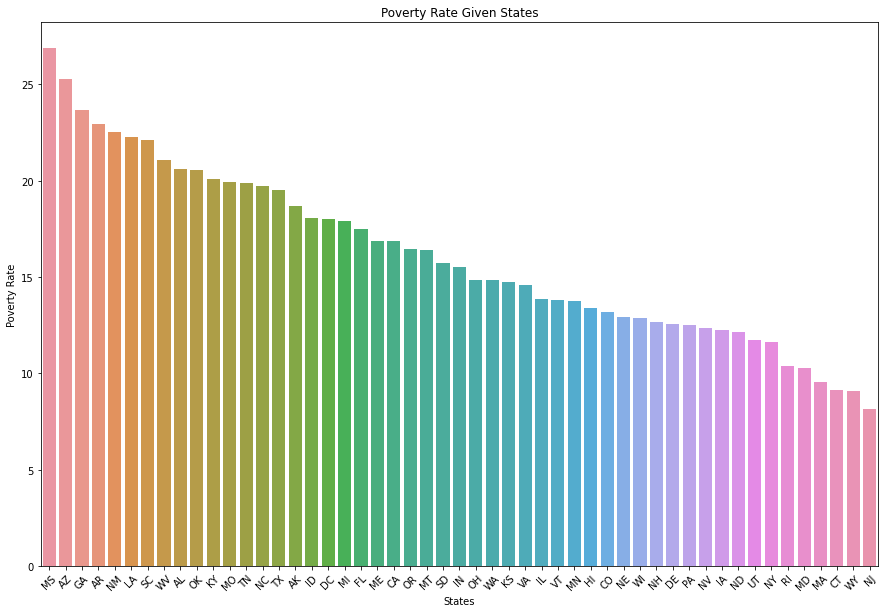

In [14]:
#Barplot ile gösterim

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

## Öldürülen insanların isimleri ve soy isimleri arasında en çok kullanılan 15 tanesini kullanılanı bulmak

In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [16]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [17]:
#Datayı inceleyelim
kill.name.value_counts()

TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64

In [18]:
#TK TK isminde şüpheli bir tekrar var
#Ve name feature'ı bir string
separate = kill.name[kill.name != 'TK TK'].str.split() 
a,b = zip(*separate)                    
name_list = a+b                         
name_count = Counter(name_list) 
name_count

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 42,
         'Matthew': 24,
         'Michael': 91,
         'Kenneth': 19,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 3,
         'Patrick': 13,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 56,
         'Artago': 1,
         'Thomas': 26,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Jeffrey': 18,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 23,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 46,
         'Jonathan': 13,
         'Carter': 2,
         'Paul': 19,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 10,
       

In [19]:
#En az 15 tane tekrar eden isimleri yakala
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

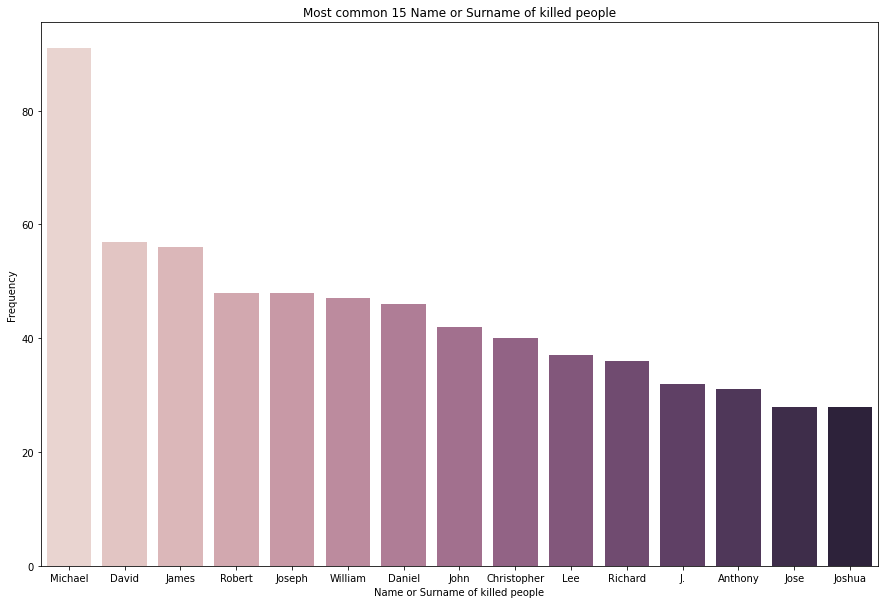

In [20]:
#Barplot ile gösteriyoruz
plt.figure(figsize=(15,10))
#cubehelix_palette uyumlu renklerle en popüler isimlerce görüntüleme imkanı veriyor
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

## Eyaletlerdeki 25 yaşından büyük insanların liseden mezun olma oranları nedir?

In [21]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [22]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [23]:
#Veride oranlarda eksiklik/yanlışlık var mı?
percent_over_25_completed_highSchool.percent_completed_hs.value_counts().head(10)

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
Name: percent_completed_hs, dtype: int64

In [24]:
#"-" olanı 0.0 ile doldur
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)

In [25]:
#Object'i sayısal değere dönüştür
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

In [26]:
#unic değerleri listele
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())

In [27]:
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

In [28]:
#Listeyi sıralamak
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

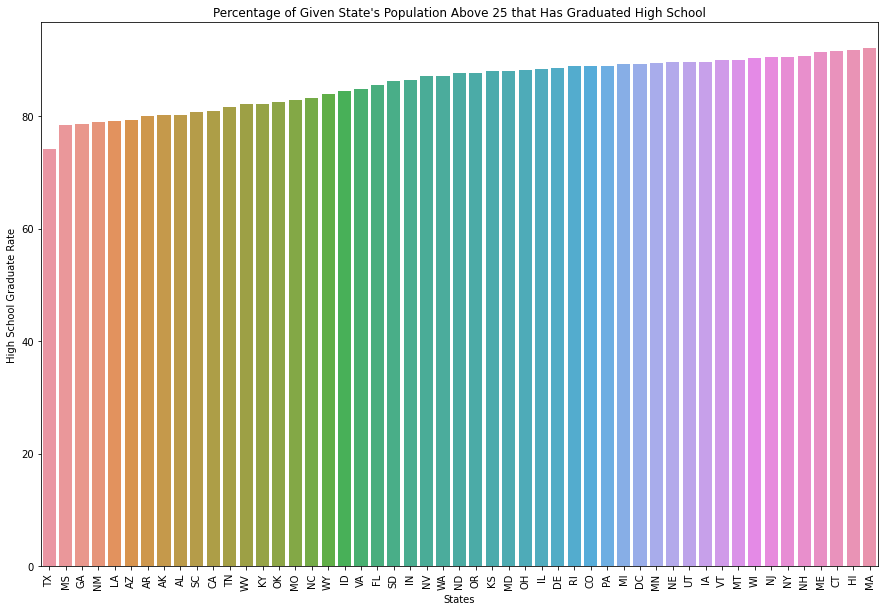

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

## Eyaletlerdeki ırkların oranları nedir?

In [30]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [31]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [32]:
share_race_city['share_hispanic'].value_counts().head()

0      2489
1       584
0.9     579
1.4     578
1.1     569
Name: share_hispanic, dtype: int64

In [33]:
#Uyumsuz değerler var mı?
unknownValues = [] # uyumsuz değerlerin toplanacağı liste
indis = share_race_city.share_hispanic.index.values # Uyumsuz verilerin bulunduğu satır numarası
values = share_race_city.share_hispanic.values # Uyumsuz veriler
for i,j in zip(indis, values):
    try:
        float(j) # burada ilgili veriyi float yapmaya çalışıyoruz. Yapamaz ise uyumsuz veridir. Dolayısıyla listeye ekliyoruz.
    except:
        unknownValues.append([i,j])
print(unknownValues)

[[630, '(X)'], [678, '(X)'], [777, '(X)'], [1946, '(X)'], [2134, '(X)'], [2160, '(X)'], [3194, '(X)'], [3248, '(X)'], [3331, '(X)'], [3345, '(X)'], [11621, '(X)'], [13953, '(X)'], [14003, '(X)'], [14151, '(X)'], [21217, '(X)'], [25324, '(X)'], [25744, '(X)'], [26107, '(X)'], [26108, '(X)'], [29243, '(X)']]


In [34]:
#Sorunlu verileri değiştirme
share_race_city.replace(['-'],0.0,inplace = True)
share_race_city.replace(['(X)'],0.0,inplace = True)

In [35]:
#Objeleri floata dönüştürme
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)

In [36]:
#Eyaletlere göre oranlama işlemi
area_list = list(share_race_city['Geographic area'].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))

[Text(0.5, 0, 'Percentage of Races'),
 Text(0, 0.5, 'States'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

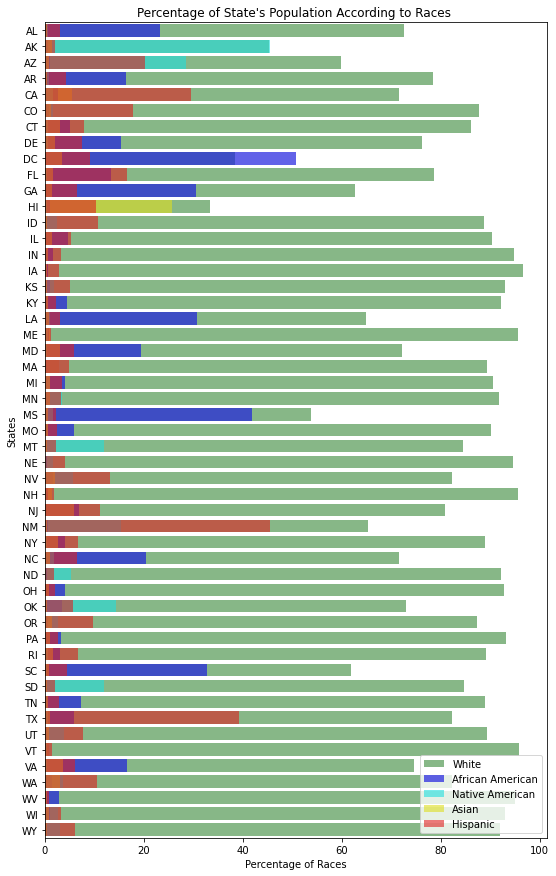

In [37]:
#Yatay barplot
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=share_white,y=area_list,color='green',alpha = 0.5,label='White' )
sns.barplot(x=share_black,y=area_list,color='blue',alpha = 0.7,label='African American')
sns.barplot(x=share_native_american,y=area_list,color='cyan',alpha = 0.6,label='Native American')
sns.barplot(x=share_asian,y=area_list,color='yellow',alpha = 0.6,label='Asian')
sns.barplot(x=share_hispanic,y=area_list,color='red',alpha = 0.6,label='Hispanic')

#Irkları temsil eden renklerin kartelası ve konum bilgileri
ax.legend(loc='lower right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

## Point Plot

 Her bir eyaletteki liseden mezun olma oranı ile fakirlik oranının karşılaşrırılması

In [38]:
#Fakirlik oranını gösteren, eyaletlerin fakirlik oranını sıralı gösteren data
sorted_data.head()

,area_list,area_poverty_ratio
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675


In [39]:
#Liseden mezun olma durumunu eyalaetlere göre sıralayan data
sorted_data2.head()

,area_list,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


In [40]:
#Normalizasyon: Veriye zarar vermeden orantılı bir boyuta (0-1 arasına) getirmek
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
#İki datayı kolonlarda birleştirme işlemi
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

In [41]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


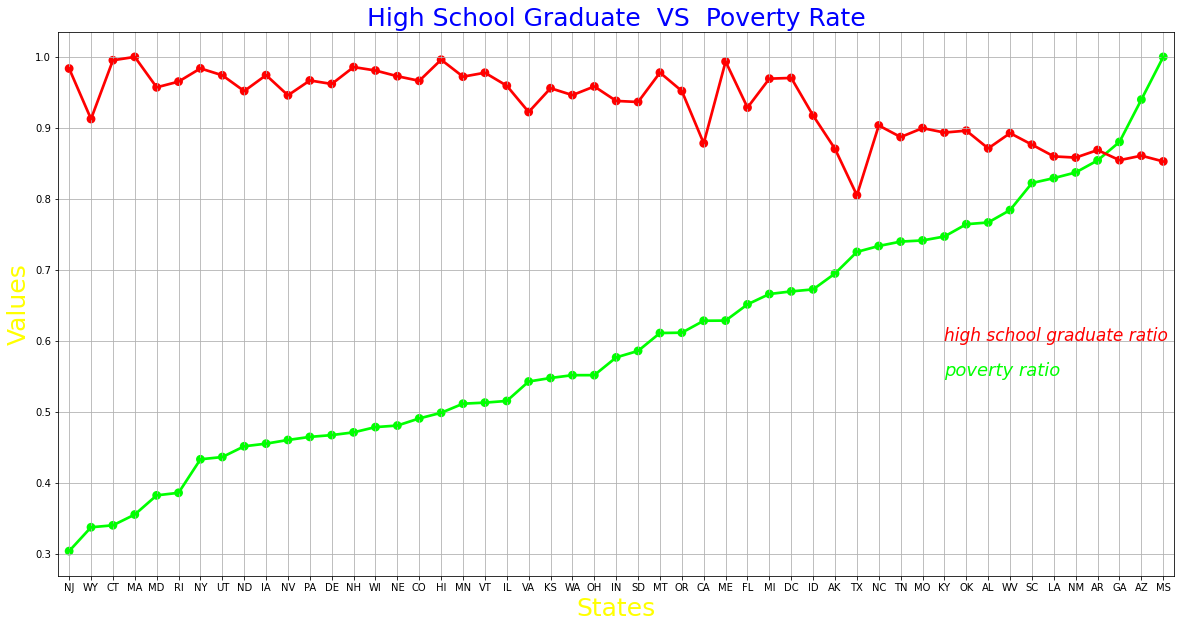

In [42]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 25,color='yellow')
plt.ylabel('Values',fontsize = 25,color='yellow')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 25,color='blue')
plt.grid()

## Liseden Mezun Olma Oranı İle Fakirlik Oranını Karşılaştır

Joint Plot

In [46]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ahmet\anaconda3\lib\site-packages\seaborn\axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


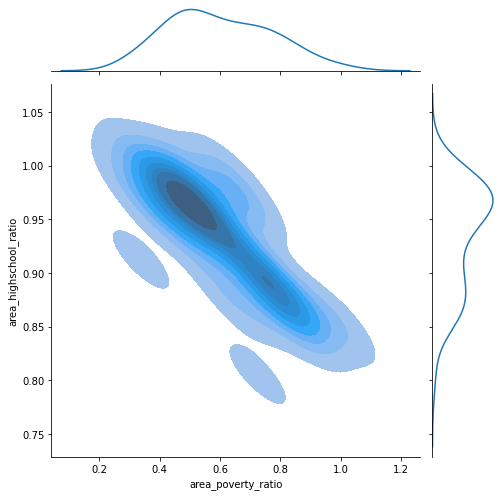

In [52]:
g = sns.jointplot(  data.area_poverty_ratio,
                    data.area_highschool_ratio, 
                    kind="kde", 
                    size=7,
                    shade=True);
plt.savefig('graph.png');
plt.show();